In [13]:
#Descripción: Código fuente para la practica 2 "Clasificador bayesiano"
#Bibliotecas
import os
import re
import numpy as np
from PIL import Image, ImageFilter
import PIL
import pandas as pd
from sklearn.naive_bayes import GaussianNB

ruta = "Comida/"

In [2]:
#Abrir archivo de imagen
def abrirImagen(img):
    return Image.open(ruta+img) #Se abre la imagen con la bilbioteca PIL

#Definimos la función para aplicar el filtro a una imagen
def filtroGaussiano(img):
    return img.filter(ImageFilter.GaussianBlur(radius = 5)) # Aplicamos GaussianBlur de PIL con radio = 5

In [3]:
#Guardar imagenes de entrenamiento con filtro
def guardarImagenes():
    imagenes = os.listdir(ruta) #Obtener los nombres del ls archivos en la carpeta comida
    for imagen in imagenes: #Iterar sobre el arreglo de imagenes
        if re.match(r"^Entrenamiento",imagen): #Nombres que tengan la palabra "Entrenamiento"
            img = abrirImagen(imagen) #Abrir imagen con bilbioteca PIL
            img = filtroGaussiano(img) #Aplicar el filtro gaussiano a la imagen
            #img = img.save(ruta+"Blur"+imagen) #Guardar la imagen con el filtro aplicado
            
    print("---  Imagenes de entrenamiento --- ")
    for imagen in imagenes: #Iterar sobre el arerglo de imagenes
        if re.match(r"^Entrenamiento",imagen): #Nombres que tengan la palabra "Entrenamiento"
            display(imagen) #Mostrar el nombre de la imagen
            img = abrirImagen(imagen) #Abrir imagen con bilbioteca PIL
            display(img) #Mostrar la imagen
            
    imagenes = os.listdir(ruta) #Obtener los nombres del ls archivos en la carpeta comida con los filtros blur
    print("---  Imagenes de entrenamiento con el filtro aplicado --- ")
    for imagen in imagenes: #Iterar sobre el arerglo de imagenes
        if re.match(r"^Blur",imagen): #Nombres que tengan la palabra "Blur"
            display(imagen) #Mostrar nombre de la imagen
            img = abrirImagen(imagen) #Abrir imagen con bilbioteca PIL
            display(img) #Mostrar imagen

In [11]:
#Redimensinar imagen de 3D a 2D
def redimensionarImagen(arr):
    arr = arr.reshape((arr.shape[0]*arr.shape[1],arr.shape[2])) #Converimos la matriz de 3D a 2D (col*row,canal)
    arr = arr[~np.all(arr == 0, axis=1)] # Se eliminan todos los 0's de la matriz
    arr = np.delete(arr ,np.where((arr[:,3] != 255))[0], axis=0) #Eliminamos el canal alfa de la imagen
    return arr #Regresamos la imagen a 2D sin canal alfa

#Obtención de la media y la matriz de covarianza
def metricas(img):
    imagenes = os.listdir(ruta) #Obtener los nombres del ls archivos en la carpeta comida
    arr_mask = np.array([[]]) #Crear un arreglo vacio donde guardamos toda la información de las mascaras
    arr_mask = np.resize(arr_mask,(0,3)) #Redimensinar el arreglo para que tenga las columnas R G B
    
    for mask in imagenes: #Iterar sobre las imagenes
        if re.match(r"^"+img,mask): # Condicional para buscar imagenes con el nombre de las mascara dada
            imagen = abrirImagen(mask) # Abrir la imagen de la mascara
            display(imagen) # Mostrar la imagen de la mascara
            imagen = np.array(imagen) # Convertir la imagen en un arreglo 
            imagen = redimensionarImagen(imagen) # Redimensionar la imagen para tener las columnas R G B
            imagen = np.delete(imagen,3,1) # Eliminar la ultima columna del arreglo (canal alpha)
            arr_mask = np.concatenate((arr_mask, imagen), axis=0) #Concatenar los arreglos
    

    cov = np.cov(arr_mask, rowvar=0) #Calcular la matriz de covarianza del arreglo de las mascaras
    print("---  Matriz de covarianza --- ")
    print(cov) # Matriz de covarianza
    print()
    
    media = arr_mask.mean(0) # Calcular la media tomando como base las columnas
    print("---  Media ---")
    print(media) # Media 
    print()
    
    return cov,media

def probabilidadBayes(X,covarianza,media,probabilidad):
    m = X - media
    mT = np.transpose(m) #Calcular la transpuesta de M
    cI = np.linalg.inv(covarianza) #Calcular la inversa de la covarianza
    cD = np.linalg.det(covarianza) #Calcular el determinante de la covarianza
    lnS = np.log(cD) # Calcular el logaritmo natural del determinante de la covarianza
    lnP = np.log(probabilidad) # Calcular el logaritmo natural de la probabildad
    
    Y = -1/2*mT@cI@m - 1/2*lnS+lnP #Obtener la probabilidad
    return Y 

    #Yk(X) = -1/2*(X-μk)T * Sk*-1 (X-μk) - 1/2 * ln(|Sk|) + ln(P(Ck))
    
def obtenerClase(Y):
    #Clases
    # 0 : Huevos rgba(242,242,242,255)
    # 1 : Chiles rgba(175,175,175,255)
    # 2 : Platanos rgba(81,81,81,255)
    # 3 : Fondo rgba(0,0,0,255)
    idx = Y.index(max(Y)) #Obtener index de la clase con la probabilidad mas alta
    if(idx == 0):
        return [242,242,242,255] # Color para la clase huevos
    elif(idx == 1):
        return [175,175,175,255] # Color para la clase chiles
    elif(idx == 2):
        return [81,81,81,255] # Color para la clase Platnos
    else:
        return [0,0,0,255] # Color para la clase fondo
      

---  Imagenes de entrenamiento --- 


'Entrenamiento1.jpg'

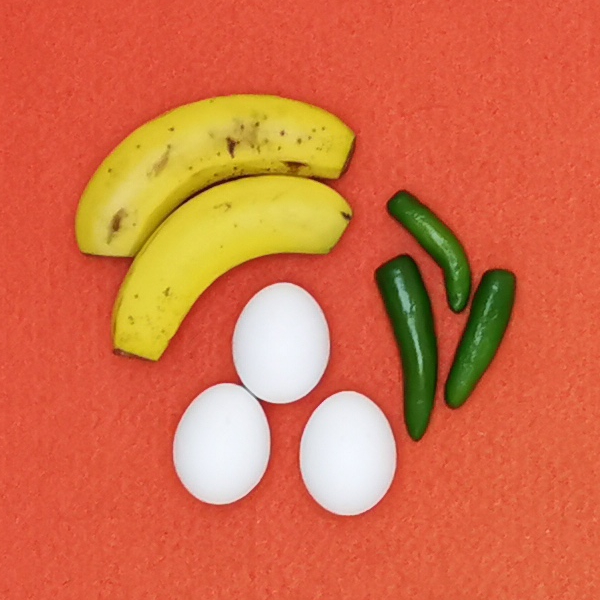

'Entrenamiento2.jpg'

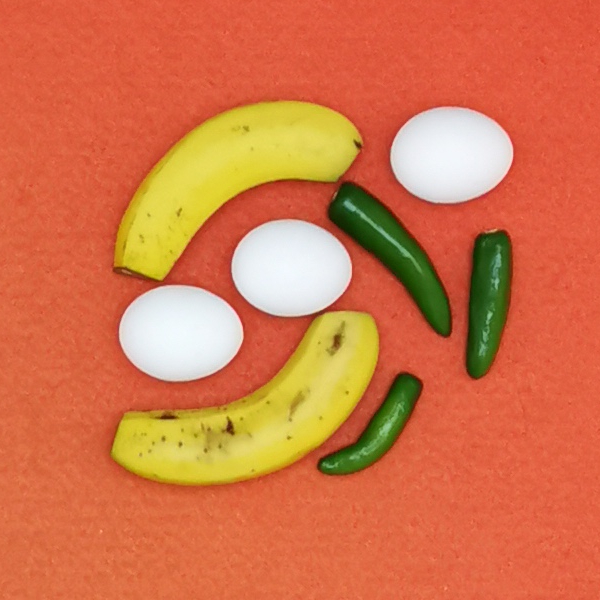

'Entrenamiento3.jpg'

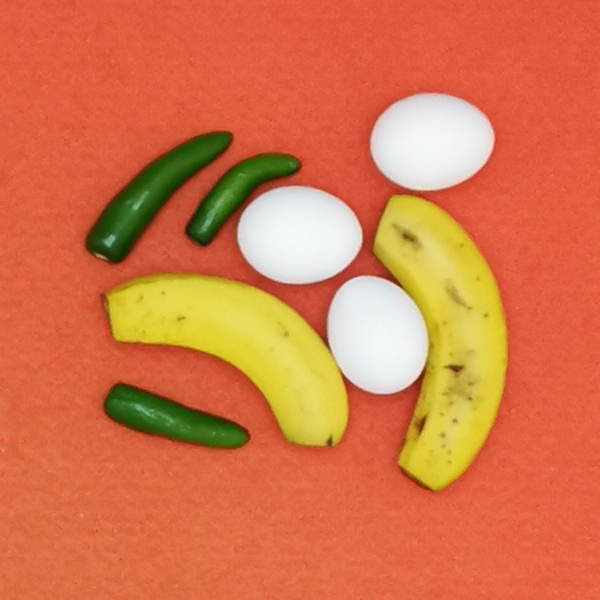

'Entrenamiento4.jpg'

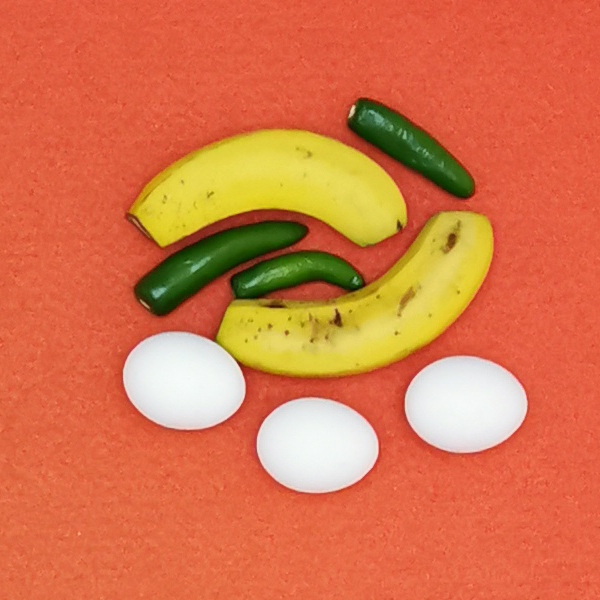

---  Imagenes de entrenamiento con el filtro aplicado --- 


'BlurEntrenamiento1.jpg'

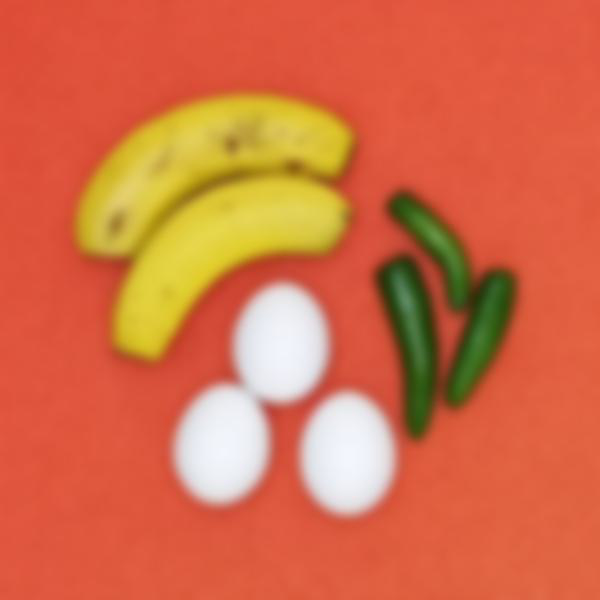

'BlurEntrenamiento2.jpg'

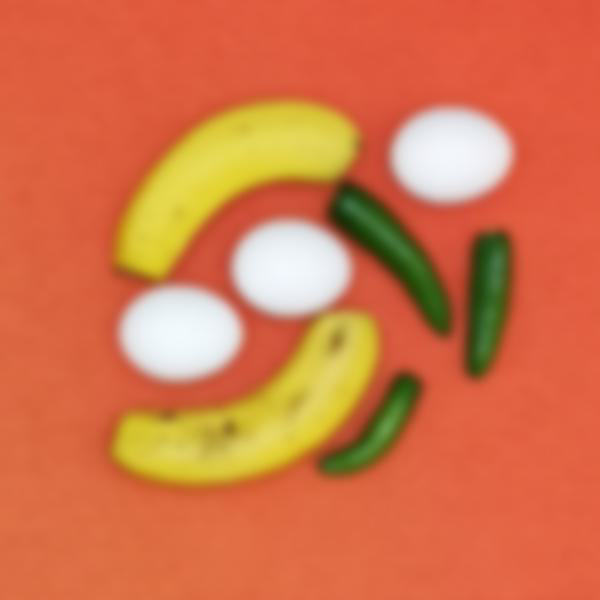

'BlurEntrenamiento3.jpg'

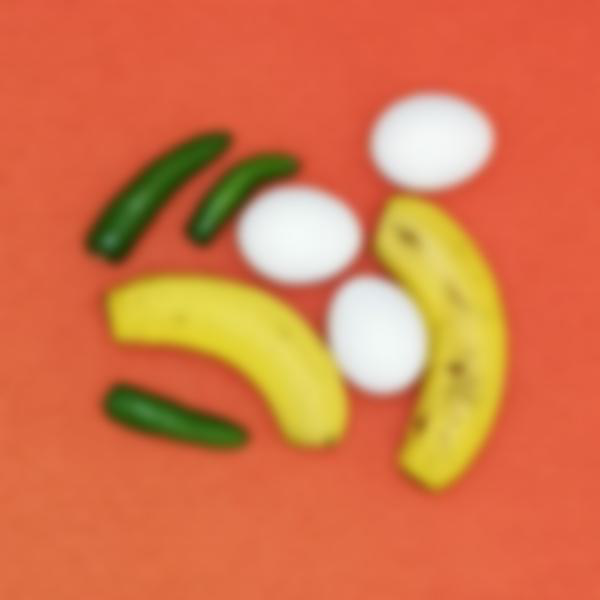

'BlurEntrenamiento4.jpg'

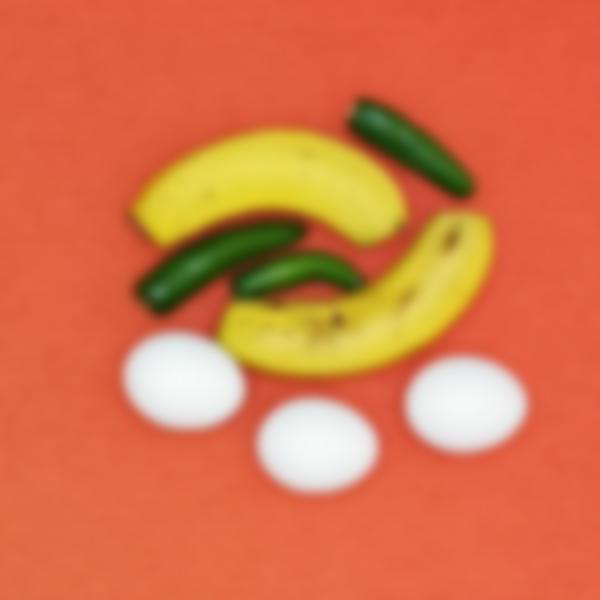

--------------------  Mascaras de analisis --------------------

---  Mascaras de los huevos --- 


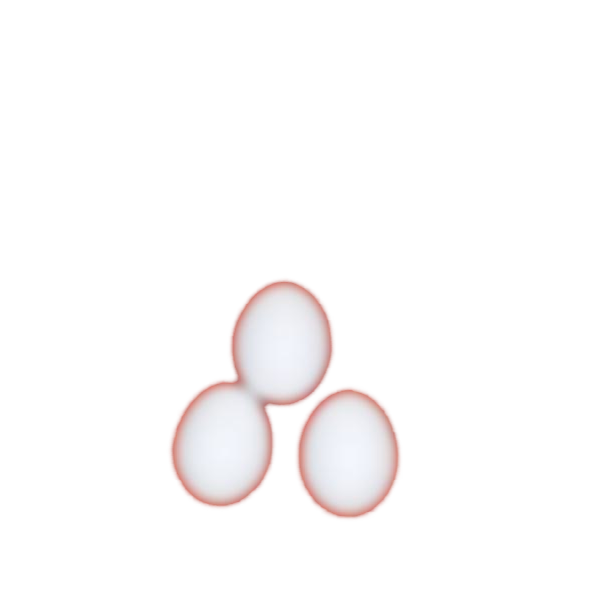

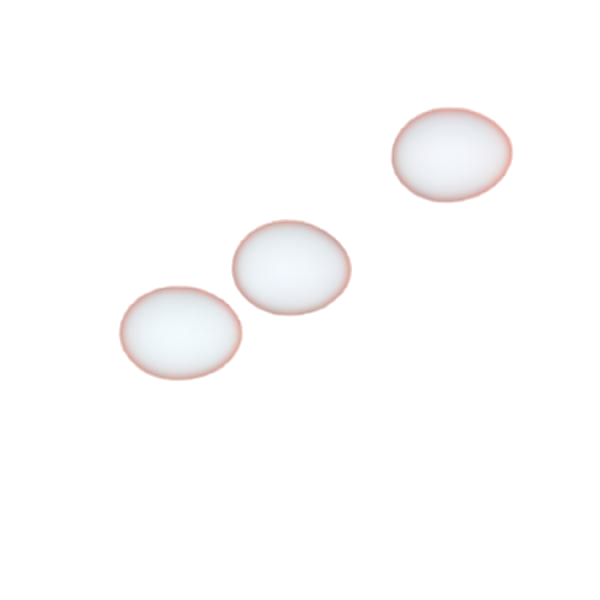

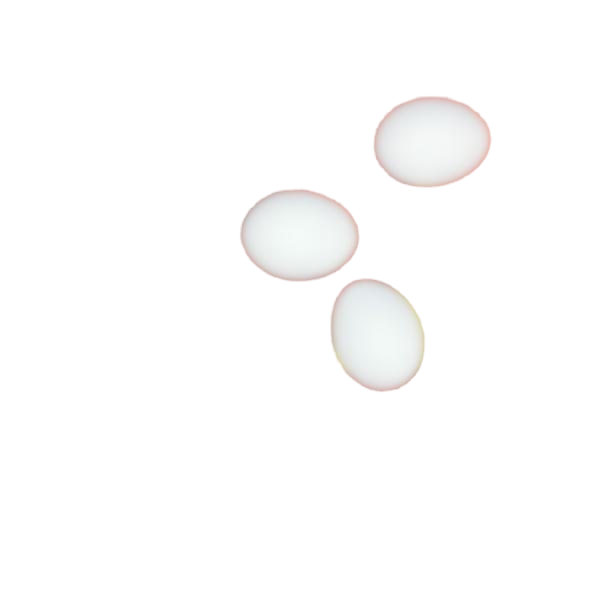

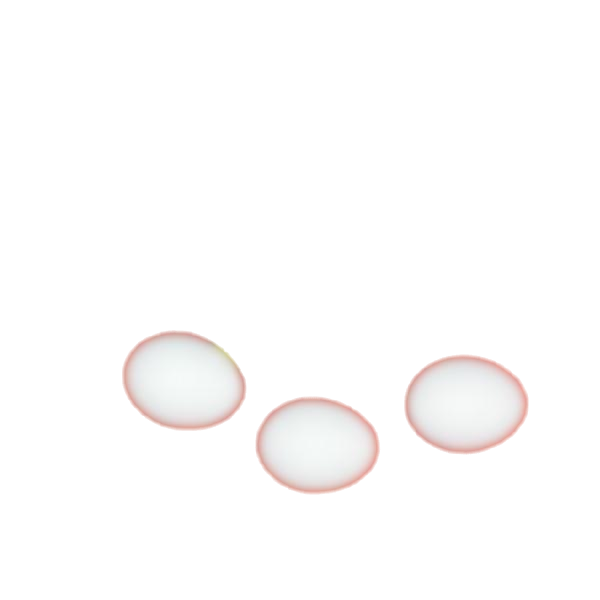

---  Matriz de covarianza --- 
[[ 89.47373952 193.45045326 208.49793139]
 [193.45045326 556.48178801 606.78557903]
 [208.49793139 606.78557903 675.50148658]]

---  Media ---
[230.79739271 225.6084611  226.29205125]

---  Mascaras de los chiles --- 


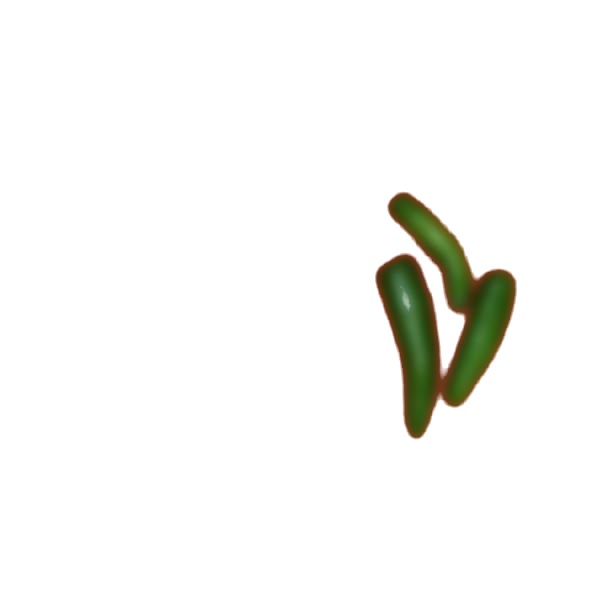

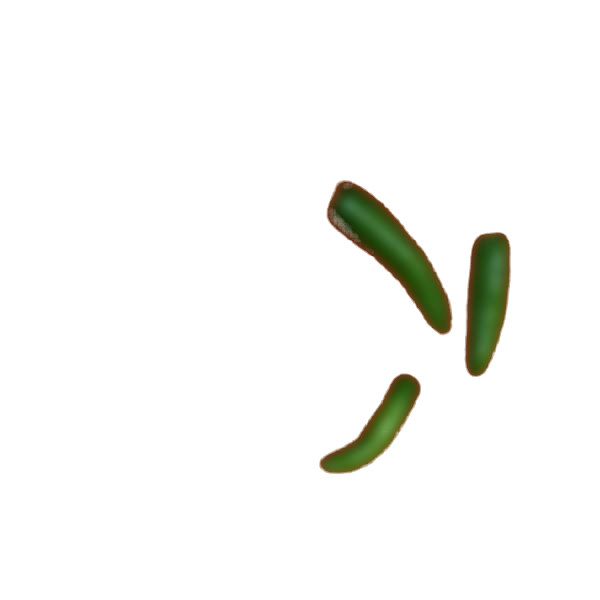

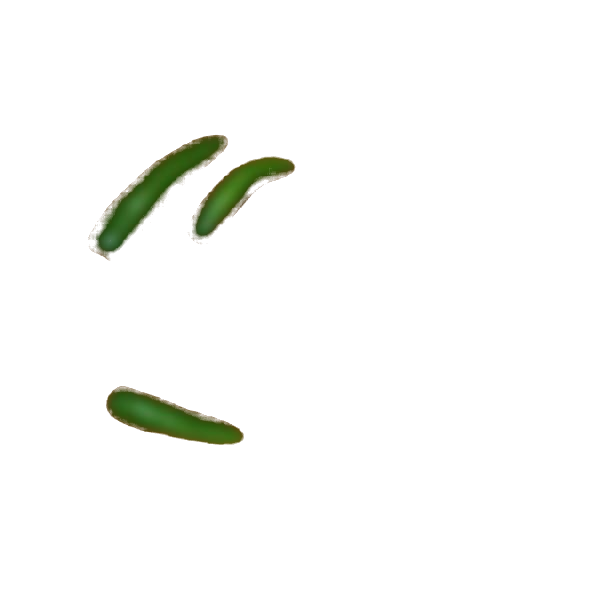

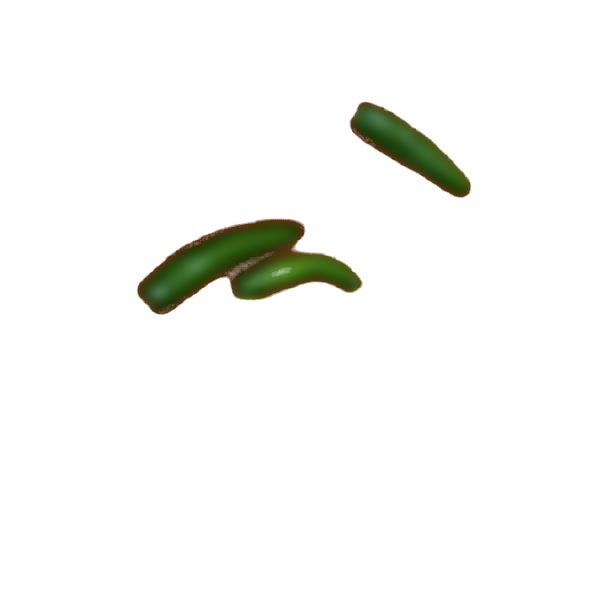

---  Matriz de covarianza --- 
[[309.99144553  22.57522634  55.80257143]
 [ 22.57522634 413.74157428 207.48128495]
 [ 55.80257143 207.48128495 186.24753341]]

---  Media ---
[62.2920819  85.51015937 25.72092753]

---  Mascaras de los platanos --- 


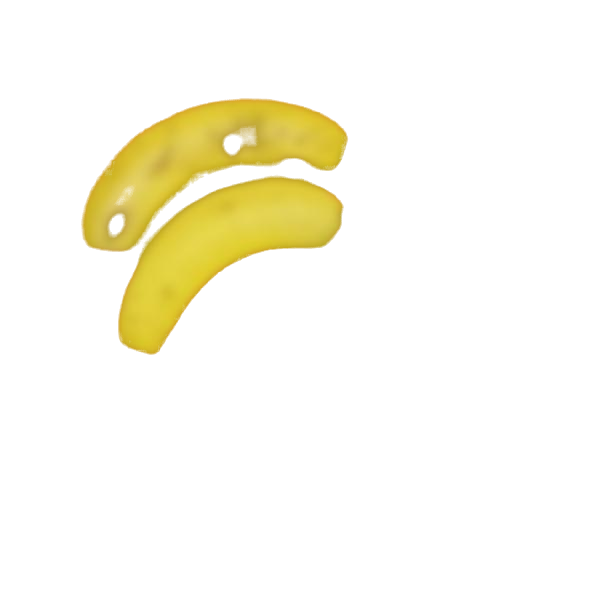

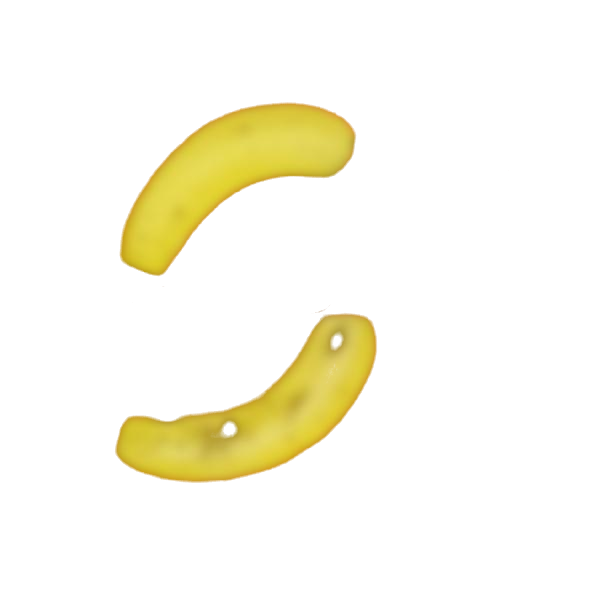

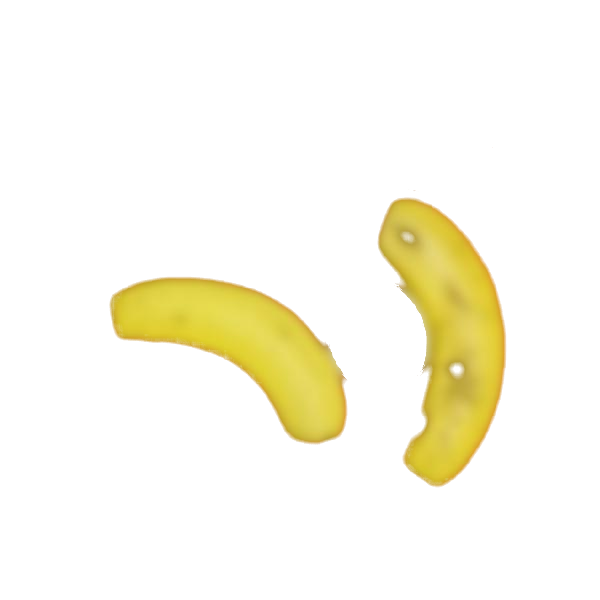

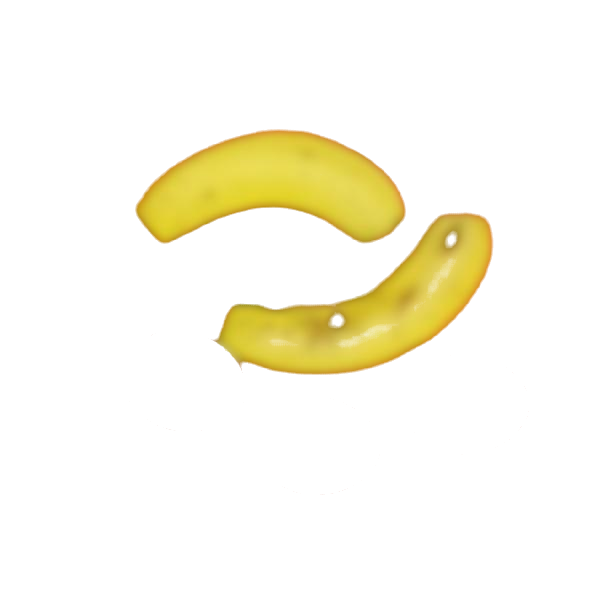

---  Matriz de covarianza --- 
[[ 90.64692216 121.69548464  66.55543308]
 [121.69548464 208.63255622 127.98428027]
 [ 66.55543308 127.98428027 239.15911367]]

---  Media ---
[219.0380522  198.31734803  62.78603204]

---  Mascaras del fondo --- 


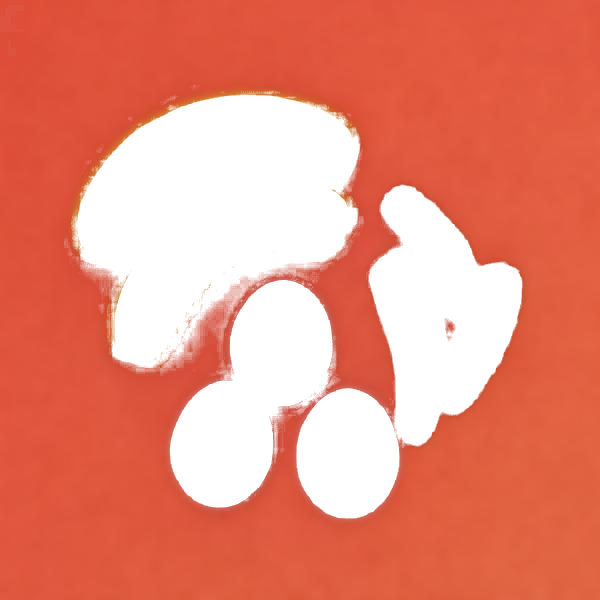

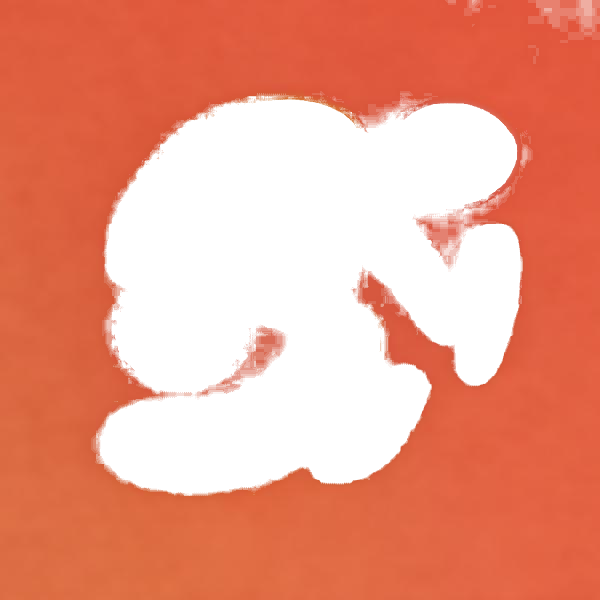

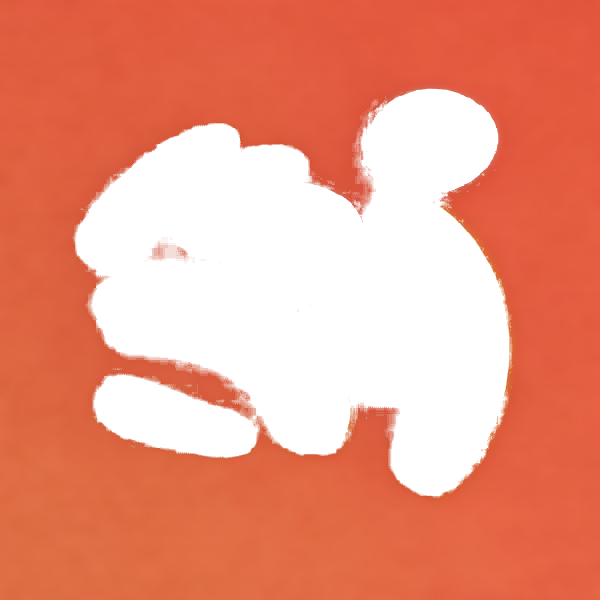

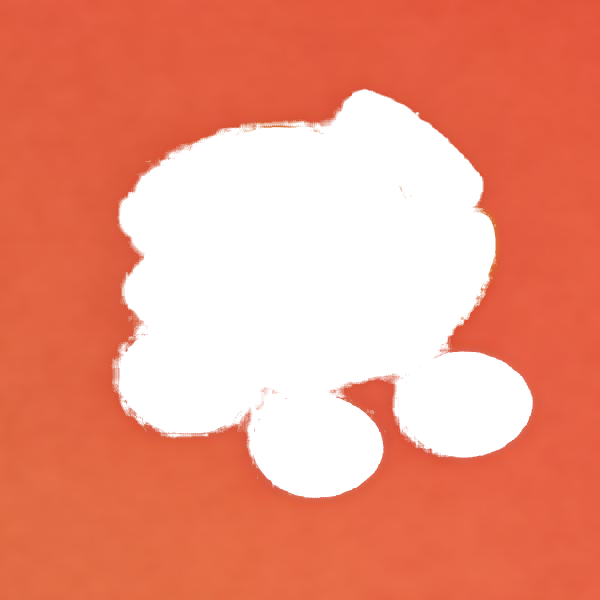

---  Matriz de covarianza --- 
[[15.00939231  7.80489115  7.72631273]
 [ 7.80489115 57.21190882 21.67442794]
 [ 7.72631273 21.67442794 13.22872007]]

---  Media ---
[224.73398667  94.828509    64.45803371]

---  Imagen de prueba --- 


'Prueba1.jpg'

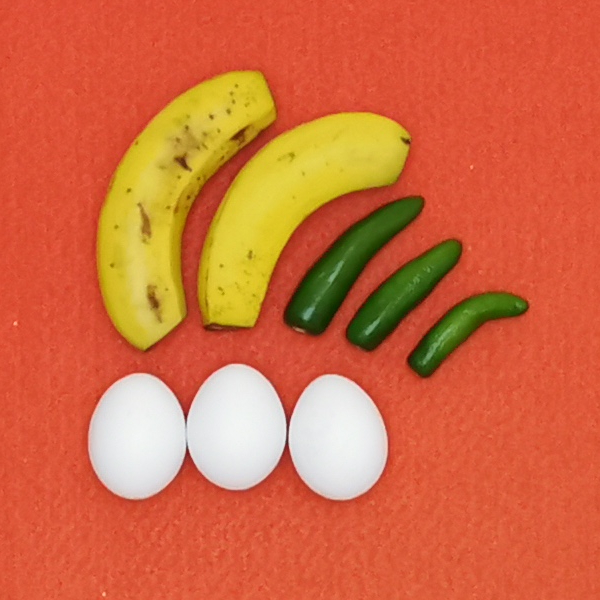

---  Imagen creada con el clasificador bayesiano --- 


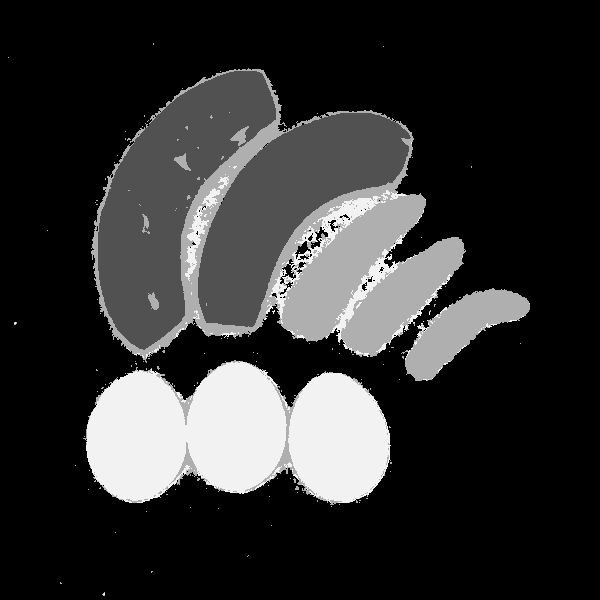

In [12]:
def main(img,mask1,mask2,mask3,mask4):
    ################################## ENTRENAMIENTO #####################################
    
    guardarImagenes() #Guardar imagenes aplicando filtro gausiano
    
    print("--------------------  Mascaras de analisis --------------------")
    print()
    
    print("---  Mascaras de los huevos --- ")
    covHuevo, mediaHuevo = metricas(mask1) #Obtener la covarianza y la media de la mascara de los huevos
    
    print("---  Mascaras de los chiles --- ")
    covChile, mediaChile = metricas(mask2) #Obtener la covarianza y la media de la mascara de los chiles
    
    print("---  Mascaras de los platanos --- ")
    covPlatano, mediaPlatano = metricas(mask3) #Obtener la covarianza y la media de la mascara de los platanos
    
    print("---  Mascaras del fondo --- ")
    covFondo, mediaFondo = metricas(mask4) #Obtener la covarianza y la media de la mascara del fondo
    
    ################################## PRUEBA #####################################
    print("---  Imagen de prueba --- ")
    imagen = abrirImagen(img) #Abriendo la imagen de prueba
    display(img) #Mostar nombre de la imagen
    display(imagen) #Mostrar imagen
    imagenm = np.array(imagen) #Convertir la imagen de prueba en un arreglo para analizarlo pixel por pixel
    X = np.reshape(imagenm, (-1, 3)) #RE-dimensionar el arrglo a una matrix 2D
    X = X.tolist() #Converir el arreglo en una lista para obtener los valor pixel x pixel [R,G,B]
    
    lista_pixeles = [] #Lista donde se guardan los pixeles de la nueva imagen
    
    for pixel in X: #Iterar por cada pixel de la imagen [R,G,B]
        YHuevo = probabilidadBayes(pixel,covHuevo,mediaHuevo,0.25) #Obtener la probabilidad bayesiana dadas las metricas de la mascara de los huevos
        YChile = probabilidadBayes(pixel,covChile,mediaChile,0.25) #Obtener la probabilidad bayesiana dadas las metricas de la mascara de los chiles
        YPlatano = probabilidadBayes(pixel,covPlatano,mediaPlatano,0.25) #Obtener la probabilidad bayesiana dadas las metricas de la mascara de los platanos
        YFondo = probabilidadBayes(pixel,covFondo,mediaFondo,0.25) #Obtener la probabilidad bayesiana dadas las metricas de la mascara del fondo
        Yk = [YHuevo,YChile,YPlatano,YFondo] #Guardar las probabilidad de cada mascara
        clase = obtenerClase(Yk) #Obtener la probabilidad mas alta de las diferentes clases
        lista_pixeles.append(clase) #Asiganar el color con la probabilidad mas alta a la lista para la nueva imagen
    
    nueva_imagen = np.array(lista_pixeles) # Convertir la lista en un arreglo
    nueva_imagen = nueva_imagen.reshape(600,600,4) # Redimensionar el arreglo como formato de imagen para poder desplegarla
    nueva_imagen = Image.fromarray(nueva_imagen.astype(np.uint8)) # Converir el arreglo a una imagen dado un arreglo
    print("---  Imagen creada con el clasificador bayesiano --- ")
    display(nueva_imagen) # Mostrar la imgen creada con el clasificador bayesiano


if __name__ == "__main__":
    main("Prueba1.jpg","mask_eggs","mask_chili","mask_banana","mask_background")

---  Imagenes de entrenamiento --- 


'Entrenamiento1.jpg'

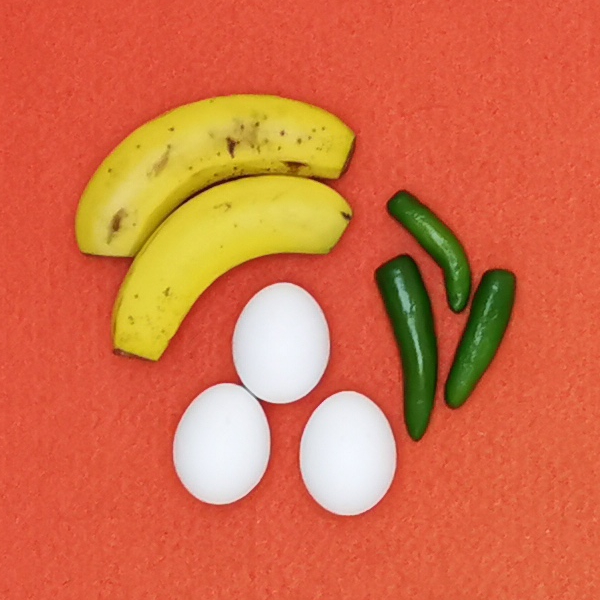

'Entrenamiento2.jpg'

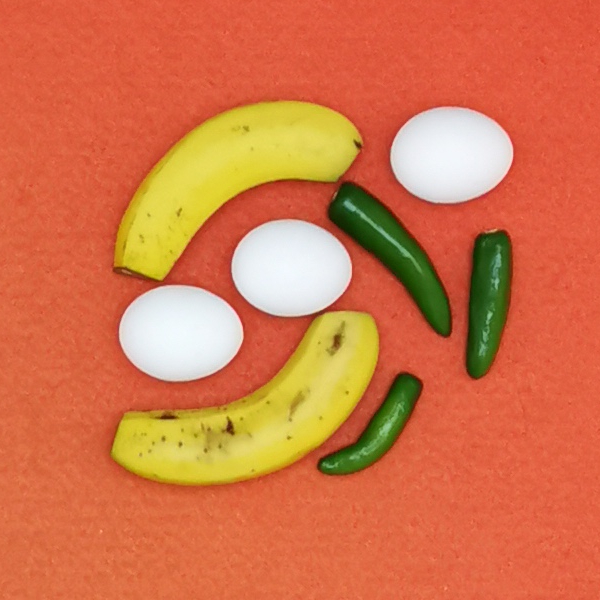

'Entrenamiento3.jpg'

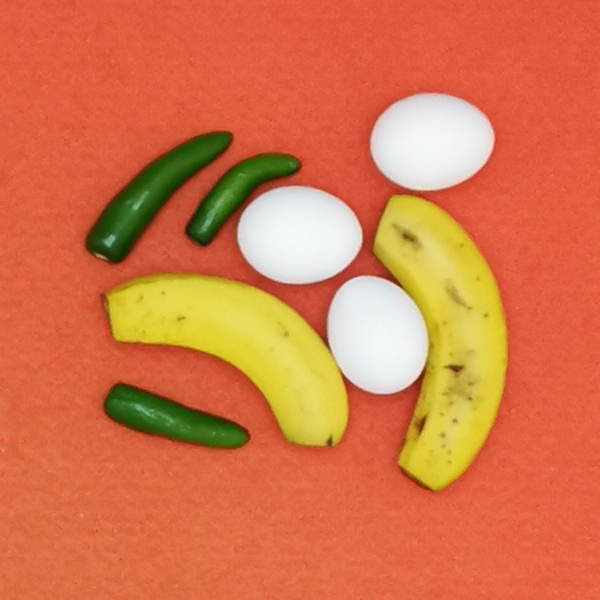

'Entrenamiento4.jpg'

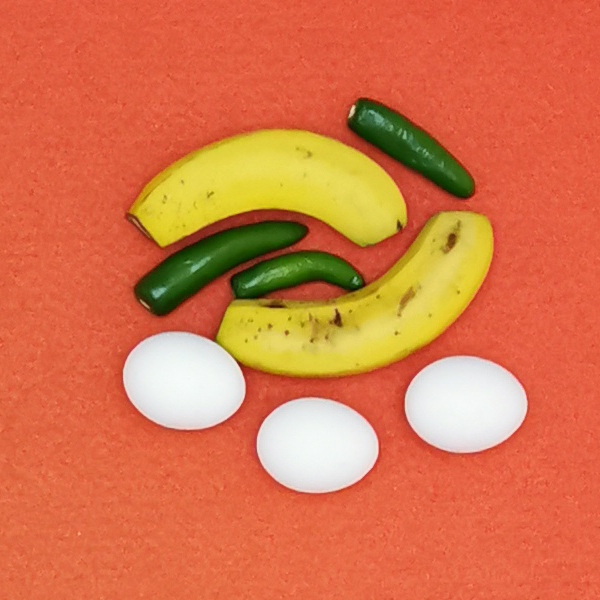

---  Imagenes de entrenamiento con el filtro aplicado --- 


'BlurEntrenamiento1.jpg'

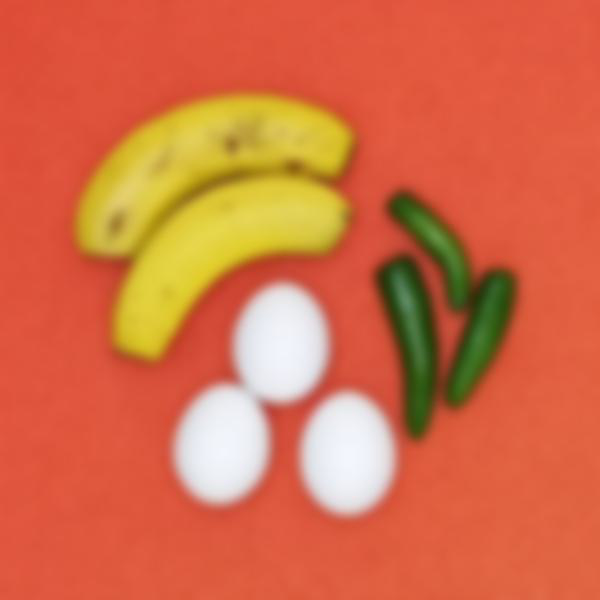

'BlurEntrenamiento2.jpg'

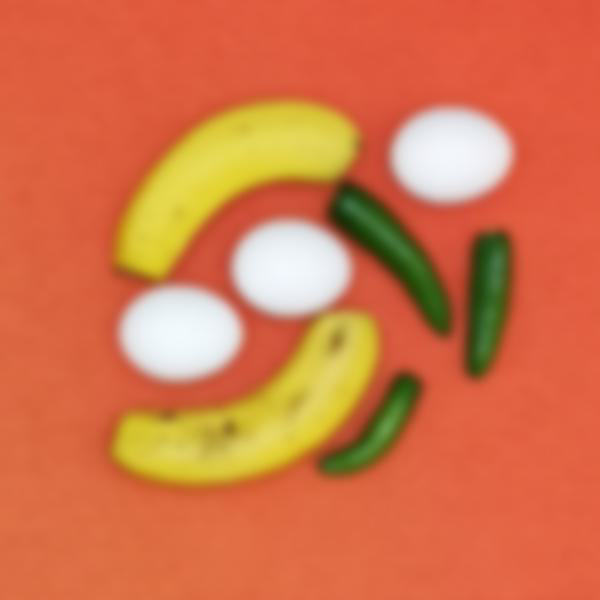

'BlurEntrenamiento3.jpg'

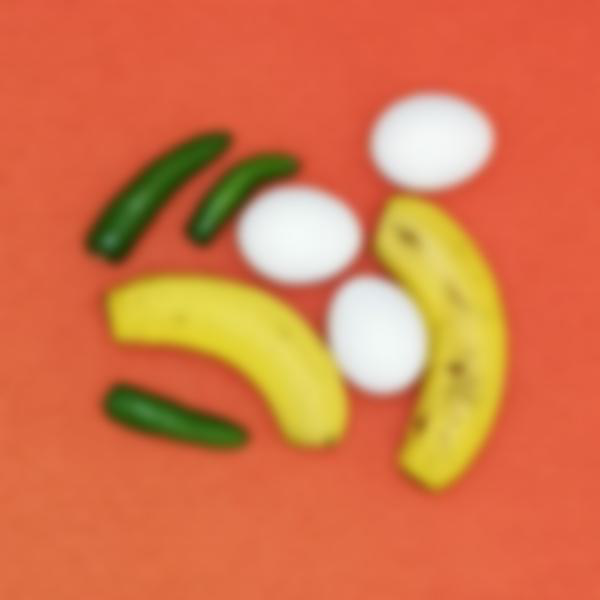

'BlurEntrenamiento4.jpg'

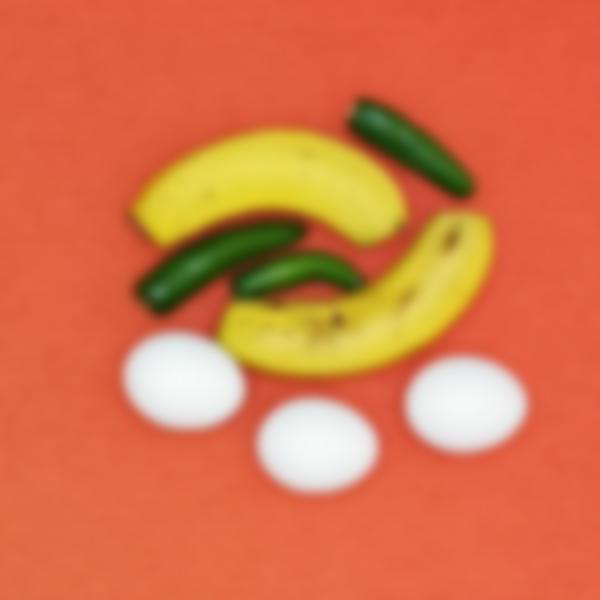

--------------------  Mascaras de analisis --------------------

---  Mascaras de los huevos --- 


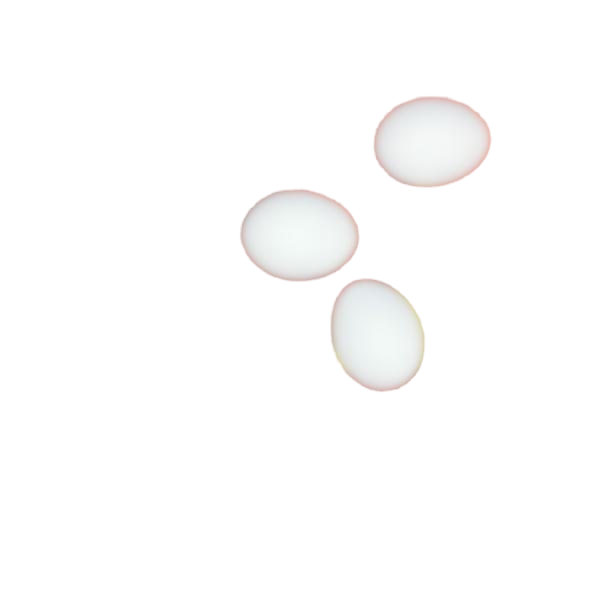

---  Matriz de covarianza --- 
[[ 75.34057322 120.71454313 126.95017318]
 [120.71454313 237.66759261 252.23175474]
 [126.95017318 252.23175474 279.93534321]]

---  Media ---
[232.18030404 232.0620535  230.6449161 ]

---  Mascaras de los chiles --- 


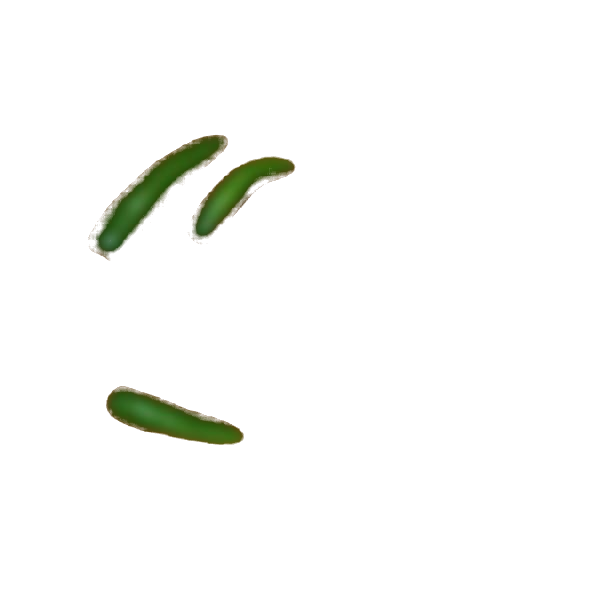

---  Matriz de covarianza --- 
[[113.38397427  59.12330842  38.26660811]
 [ 59.12330842 178.55030146 123.67871448]
 [ 38.26660811 123.67871448 157.81918997]]

---  Media ---
[57.59864492 96.13952687 25.79294901]

---  Mascaras de los platanos --- 


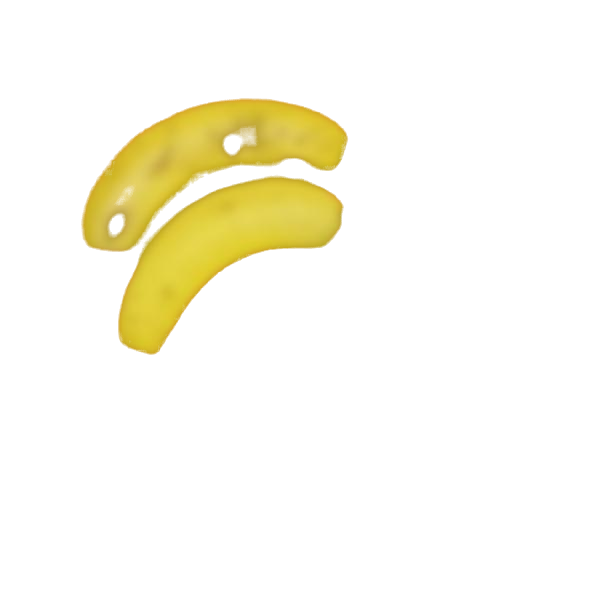

---  Matriz de covarianza --- 
[[ 59.37806971  77.0930563   40.07202415]
 [ 77.0930563  120.4567514   75.70013287]
 [ 40.07202415  75.70013287 189.32358956]]

---  Media ---
[218.6273362  196.68273423  59.35238879]

---  Mascaras del fondo --- 


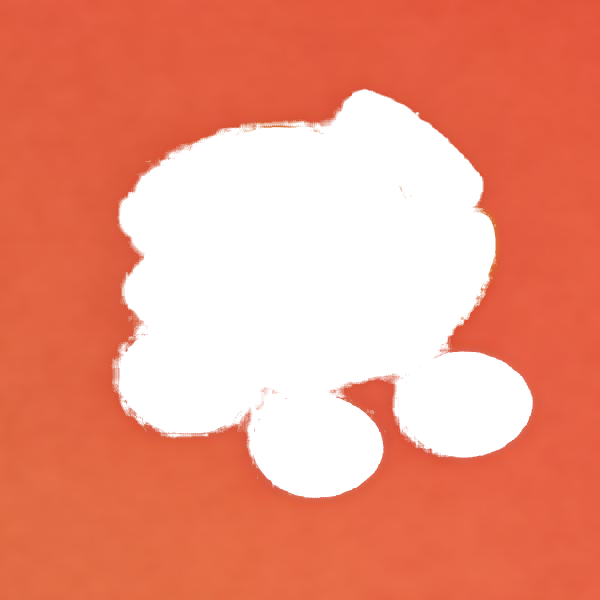

---  Matriz de covarianza --- 
[[ 9.74155453  8.08288475  6.92093473]
 [ 8.08288475 36.16258972 16.49177613]
 [ 6.92093473 16.49177613 11.08957504]]

---  Media ---
[227.43445236  96.8633214   65.960896  ]

---  Imagen de prueba --- 


'Prueba1.jpg'

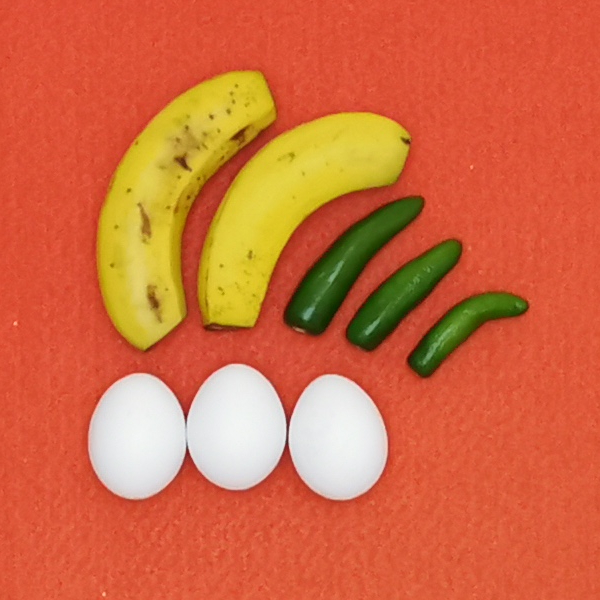

---  Imagen creada con el clasificador bayesiano --- 


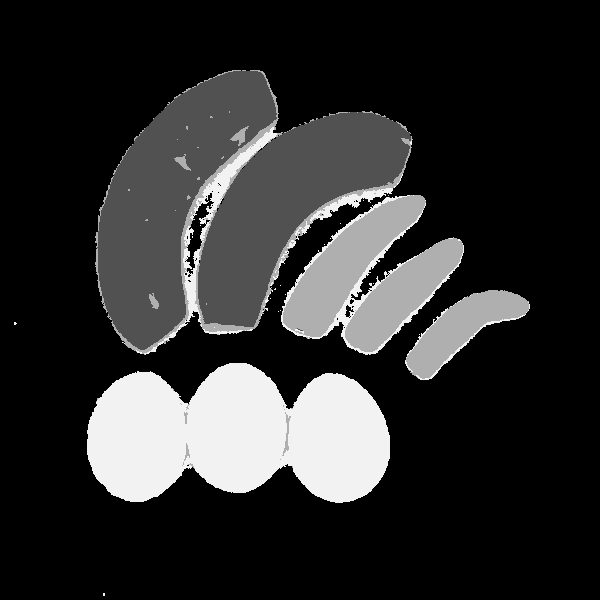

In [14]:
# Ejemplo con una mascara por cada clase
main("Prueba1.jpg","mask_eggs_3","mask_chili_3","mask_banana_1","mask_background_4")

# Clasificador bayesiano con sklearn

In [15]:
def crearFeature(nombre,clase): #Creando data frame por cada clase
    imagenes = os.listdir(ruta) #Obtener los nombres del ls archivos en la carpeta comida
    arr_mask = np.array([[]]) #Crear un arreglo vacio donde guardamos toda la información de las mascaras
    arr_mask = np.resize(arr_mask,(0,3)) #Redimensinar el arreglo para que tenga las columnas R G B

    for mask in imagenes: #Iterar sobre las imagenes
        if re.match(r"^"+nombre,mask):  # Condicional para buscar imagenes con el nombre de las mascara dada
            imagen = abrirImagen(mask)  # Abrir la imagen de la mascara
            imagen = np.array(imagen) # Convertir la imagen en un arreglo 
            imagen = redimensionarImagen(imagen) # Redimensionar la imagen para tener las columnas R G B
            imagen = np.delete(imagen,3,1) # Eliminar la ultima columna del arreglo (canal alpha)
            arr_mask = np.concatenate((arr_mask, imagen), axis=0) #Concatenar los arreglos 

    df = pd.DataFrame(arr_mask,columns=["R","G","B"]) # Convertir el arreglo en un Data Frame
    df["Clase"] = clase # Poner nombre de la clase al data frame
    return df #Regresar el data frame

In [18]:
def clasificador_skitlearn(df_train,test):
    y_train = df_train["Clase"] # Crear data frame Y de entrenamiendo (Salidas)
    x_train = df_train.drop("Clase", axis = 1) # Crear data frame X de entrenamiendo (Entradas)
    df_test = pd.DataFrame(test,columns=["R","G","B"]) # Crear data frame de prueba

    clf = GaussianNB() # Clasificador de bayes
    clf.fit(x_train, y_train) # Entrar modelo de datos de entrenamiento
    SkTest = clf.predict(df_test) # Predecir con los datos de prueba

    r = pd.DataFrame(SkTest,columns=["Clase"]) # Crear data frame apartir de los datos de prueba

    conditions = [(r["Clase"] == "Huevo"),   
                    (r["Clase"] == "Chile"),
                    (r["Clase"] == "Platano"),
                    (r["Clase"] == "Fondo")
                   ] # Condiciones para asignar un valor dependiendo de la clase 

    values = [242,175,81,0] #Valores (colores) que se asignan dependiendo de la clase
    r["R"] = np.select(conditions, values) # Agregar la columna R al data frame de salida
    r["G"] = np.select(conditions, values) # Agregar la columna G al data frame de salida
    r["B"] = np.select(conditions, values) # Agregar la columna B al data frame de salida

    r = r.drop("Clase", axis = 1) # Eliminar la columna de clase

    arr = r.to_numpy() # Convertir el data frame en un arrglo
    arr = arr.reshape(600,600,3) # Redimensionar el arreglo como formato de imagen para poder desplegarla
    arr = Image.fromarray(arr.astype(np.uint8)) # Converir el arreglo a una imagen dado un arreglo
    print("---  Imagen creada con el clasificador bayesiano de SKlearn--- ")
    display(arr) # Mostrar la imgen creada con el clasificador bayesiano

---  Imagen creada con el clasificador bayesiano de SKlearn--- 


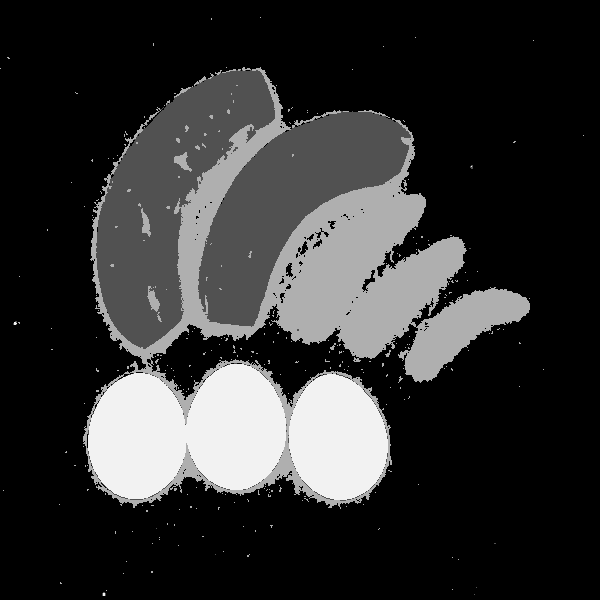

In [19]:
# Ejemplo con muchos datos de las mascaras
df_fondo = crearFeature("mask_background","Fondo") #Data frame de datos para la clase de Fondo
df_huevo = crearFeature("mask_eggs","Huevo") #Data frame de datos para la clase de Huevos
df_chile = crearFeature("mask_chili","Chile") #Data frame de datos para la clase de Chiles
df_platano = crearFeature("mask_banana","Platano") #Data frame de datos para la clase Platanos

df_train = pd.concat([df_huevo,df_chile,df_platano,df_fondo]) #Unir todos los dataframes y crear el data frame de entrenamiento
 
test = abrirImagen("Prueba1.jpg") #Abrir la imagen de prueba
test = np.array(test) #Convertir la imagen a un arreglo
test = np.reshape(test, (-1, 3)) #Redimensior el arreglo para tener Cols Rows Canal 

clasificador_skitlearn(df_train,test) # Inicar prueba

---  Imagen creada con el clasificador bayesiano de SKlearn--- 


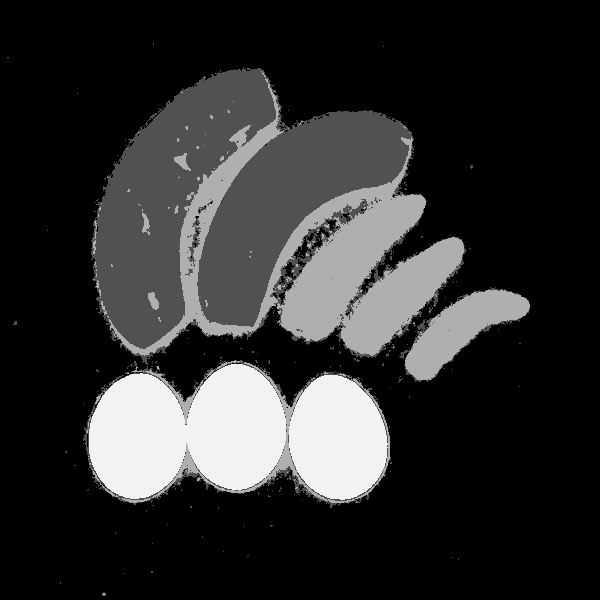

In [20]:
#Ejemplo con una mascara por clase (menos datos)
df_fondo = crearFeature("mask_background_4","Fondo") #Data frame de datos para la clase de Fondo
df_huevo = crearFeature("mask_eggs_3","Huevo") #Data frame de datos para la clase de Huevos
df_chile = crearFeature("mask_chili_3","Chile") #Data frame de datos para la clase de Chiles
df_platano = crearFeature("mask_banana_1","Platano") #Data frame de datos para la clase Platanos

df_train = pd.concat([df_huevo,df_chile,df_platano,df_fondo])  #Unir todos los dataframes y crear el data frame de entrenamiento

test = abrirImagen("Prueba1.jpg") #Abrir la imagen de prueba
test = np.array(test) #Convertir la imagen a un arreglo
test = np.reshape(test, (-1, 3)) #Redimensior el arreglo para tener Cols Rows Canal 

clasificador_skitlearn(df_train,test) # Inicar prueba